# Project: Investigating the IMDB Movie Dataset
#### *"What it takes to make a great movie"*
#### Analysis by Patrick Flynn

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this analysis, we will assume we are a screenwriter looking to make the next big blockbuster film! We are armed with an IMDB data set and our goal is to determine what genre(s) of movie we should write and what features will best determine if our movie will be profitable.

> **Data Source**: [IMDB Dataset](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)


### Libraries/Packages Utilized

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

<a id='wrangling'></a>
# Data Wrangling

### Data Acquisition

#### Read in data from CSV and preview first 5 records

In [56]:
df = pd.read_csv(r'S:\Code\School\WGU_DataAnalyst_NanoDegree\01 - Introduction to Data Science\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Inspect object types/missing data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Analysis Note**: Several columns are not relavant to the analysis and need to be removed. In addition, there are some important fields (IMDB_ID, Genres) that are missing records and will be removed from the dataset. These values cannot be imputed.

## Data Cleaning (Replace this with more specific notes!)

Rows are dropped from Genres/IMDB_ID that are null. Columns are dropped that are not relavant to analysis (see analyst note)

In [57]:
df.dropna(subset=['genres', 'imdb_id'], inplace=True)
df.drop(axis=1, columns=['homepage', 'tagline', 
                         'keywords', 'production_companies',
                        'cast', 'director', 'overview'], inplace=True)

> **Analysis Note**: The fields that are dropped could be of great importance for a future project utilizing natural language processing. However that is beyond the scope of this assignment.


#### Create function to turn lists nested in genres column to new columns for each genre

In [58]:
def transform_lists_to_columns(dataframe, column):
    mlb = MultiLabelBinarizer()
    dataframe[column] = dataframe[column].str.split('|')
    dataframe.apply(lambda x: tuple(x[column]), axis=1)
    dataframe = dataframe.join(pd.DataFrame(mlb.fit_transform(dataframe[column]), 
                                            columns=mlb.classes_, 
                                            index=dataframe.index))
    dataframe.drop(axis=1, columns=[column], inplace=True)
    return dataframe

> **Analysis Note**: This function will take the "genres" column and create a new column for each value discovered in the column. This will make analysis of individual genres FAR easier. Because this is the primary question involved in our research (to discover what genre to write), this function is incredibly important.

#### Run function on column and view subset

In [59]:
df = transform_lists_to_columns(df, 'genres')
genre_cols = list(df.columns[-20:-1])
df.loc[:, genre_cols].head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Feature Engineering
Create a "profit" variable that will determine if money was made (i.e. did the movie make more than it cost)

In [232]:
df['profit'] = df.revenue_adj - df.budget_adj

#### Convert release date to datetime and ensure all columns are of proper data type and all data is present

In [233]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 34 columns):
id                 10835 non-null int64
imdb_id            10835 non-null object
popularity         10835 non-null float64
budget             10835 non-null int64
revenue            10835 non-null int64
original_title     10835 non-null object
runtime            10835 non-null int64
release_date       10835 non-null datetime64[ns]
vote_count         10835 non-null int64
vote_average       10835 non-null float64
release_year       10835 non-null int64
budget_adj         10835 non-null float64
revenue_adj        10835 non-null float64
Action             10835 non-null int32
Adventure          10835 non-null int32
Animation          10835 non-null int32
Comedy             10835 non-null int32
Crime              10835 non-null int32
Documentary        10835 non-null int32
Drama              10835 non-null int32
Family             10835 non-null int32
Fantasy            10835 non-nul

> **Analysis Note**: All fields now have the same amount of records and there are no nulls. In our cleaning, we only removed approximately 30 records and all fields are the proper data type.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What Genre of Movie Grosses the Highest?

In [72]:
test = genre_cols.copy()

In [66]:
test.append('release_year')
test.append('revenue_adj')

In [84]:
test_data.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015],
           dtype='int64', name='release_year')

In [86]:
test_data = df.groupby('release_year').sum()[genre_cols]
test_data = test_data.loc[test_data.index > 1995, :]

[Text(201.5,0.5,'Year'), Text(0.5,111.453,'Genre')]

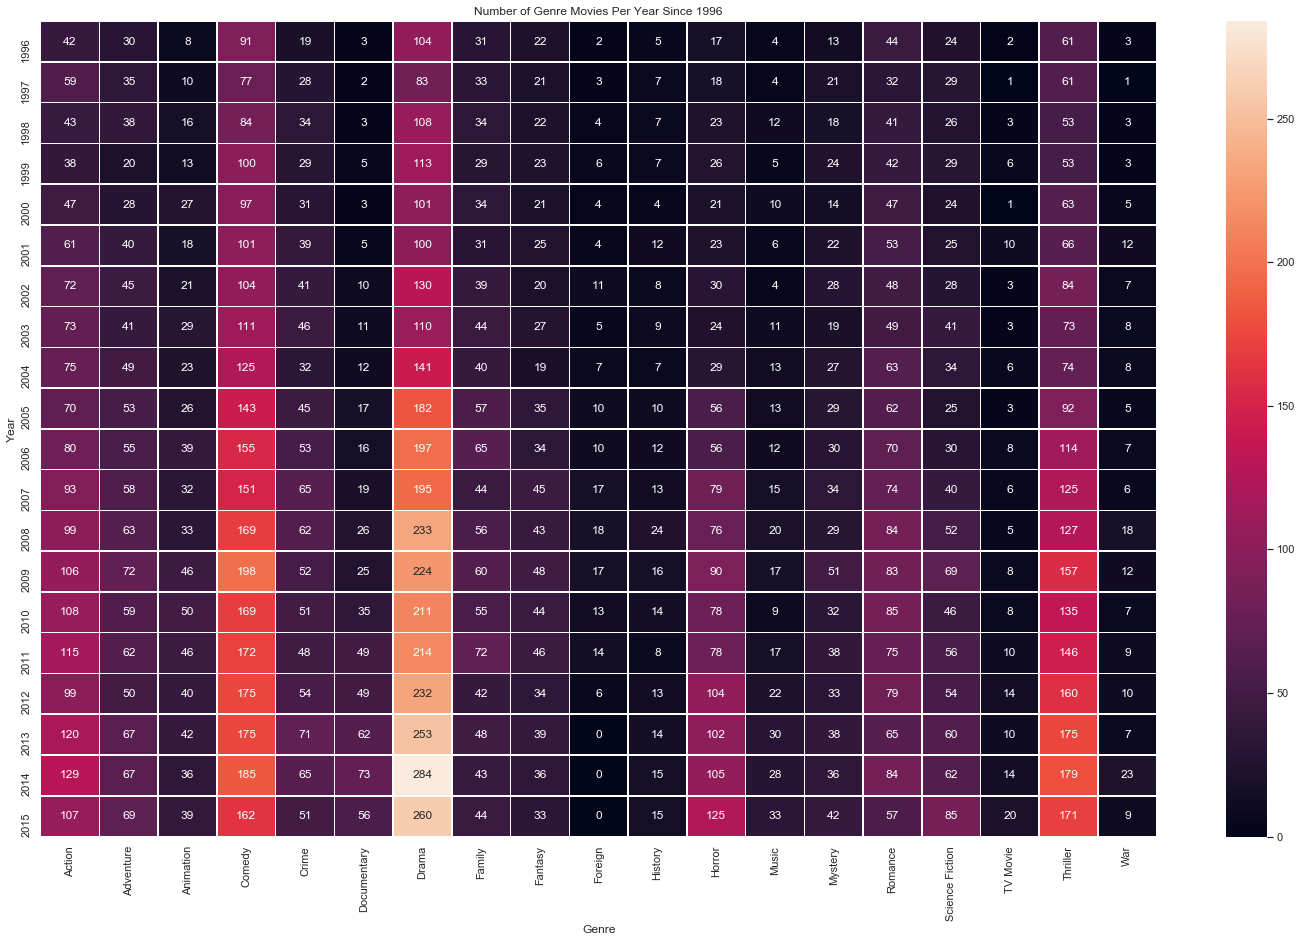

In [230]:
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
g = sns.heatmap(test_data, annot=True, fmt="d", linewidths=.5, ax=ax)
g.set(title = 'Number of Genre Movies Per Year Since 1996')
g.set(xlabel='Genre', ylabel='Year')

In [220]:
def create_genre_plots(col, adjusted_y='Billions of Dollars'):
    query_string = col + ' == 1'
    drama_data = df.query(query_string)[['release_year','revenue_adj']].groupby('release_year').sum()
    drama_data = drama_data.reset_index()
    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
    g = sns.regplot(x="release_year", y="revenue_adj",  data=drama_data, ax=axs[0])
    g.set(xlabel='Year', ylabel=adjusted_y)
    g.set(title = col + ' - Regression Scatter Plot')
    gt = sns.lineplot(x="release_year", y="revenue_adj",  data=drama_data, ax=axs[1])
    gt.set(xlabel='Year', ylabel=adjusted_y)
    gt.set(title = col + ' - Line Plot')
    plt.suptitle(col + ' Visualization Data')

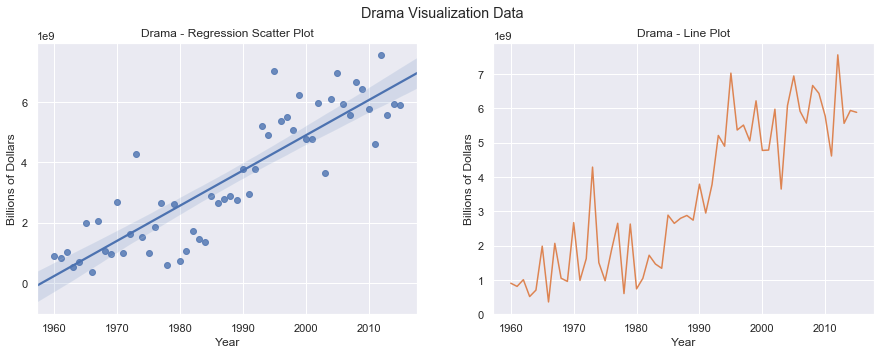

In [221]:
create_genre_plots('Drama')

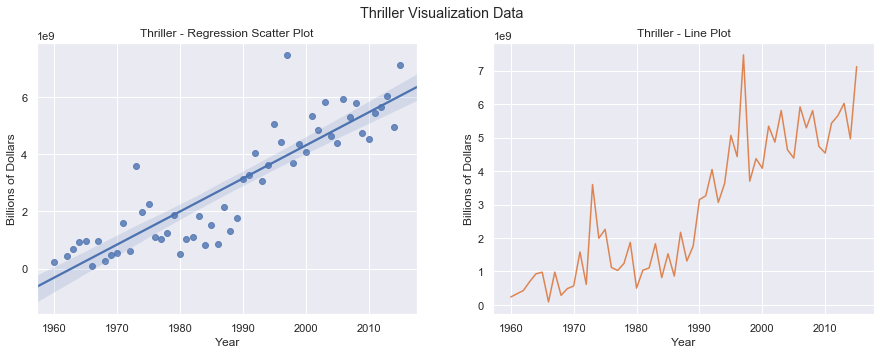

In [216]:
create_genre_plots('Thriller')

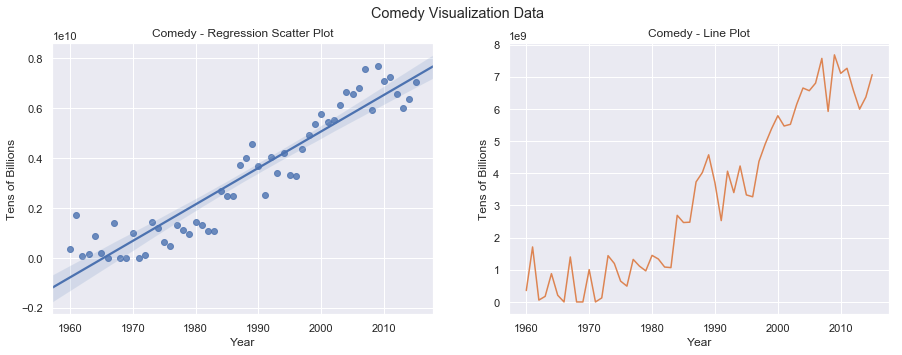

In [222]:
create_genre_plots('Comedy', adjusted_y='Tens of Billions')

The comedy genre appears to be the best suited for future growth and has had some of the highest performing years compared to other genres. The mid 90's appear to be a huge boom in comedy.

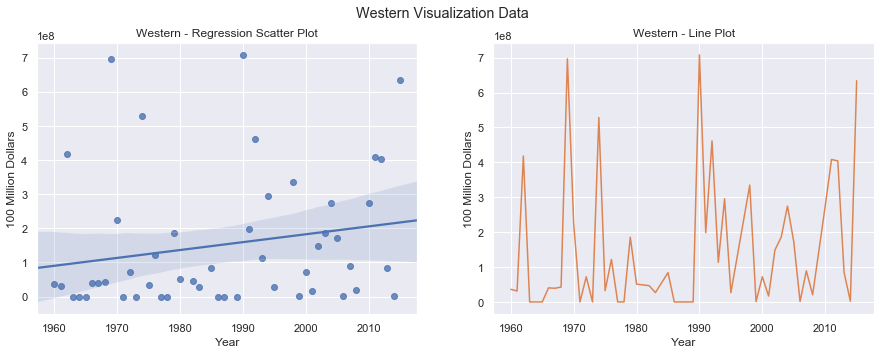

In [223]:
create_genre_plots('Western', adjusted_y='100s of Millions of Dollars')

This visualization included to shown a potential genre to stay away from. Western films have their periodic blockbusters, but overwhelmingly they do not do well in the box office.

### Research Question 2: What, If Any, Features Impact the Revenue a Movie Will Make?

In [152]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,1.000000,-0.012986,-0.140604,-0.098664,-0.085653,-0.034709,-0.061468,0.511222,-0.188361,-0.138027,...,-0.025694,0.044792,0.023911,-0.031197,-0.072956,-0.021903,0.070625,-0.024304,-0.019881,-0.030643
popularity,-0.012986,1.000000,0.545205,0.663244,0.138337,0.800779,0.211060,0.090458,0.513239,0.608931,...,-0.012796,-0.076861,-0.031456,0.011992,-0.024095,0.127193,-0.047096,0.056708,0.012759,-0.007099
budget,-0.140604,0.545205,1.000000,0.734797,0.190960,0.632544,0.082210,0.116616,0.968944,0.622336,...,0.022634,-0.115071,-0.033233,0.013335,-0.029904,0.120116,-0.058220,0.049802,0.032154,0.017306
revenue,-0.098664,0.663244,0.734797,1.000000,0.162720,0.791105,0.173758,0.057491,0.706311,0.919082,...,-0.012066,-0.083240,-0.019049,0.000680,-0.015699,0.092752,-0.042386,0.009188,0.010464,-0.012068
runtime,-0.085653,0.138337,0.190960,0.162720,1.000000,0.163153,0.159131,-0.117246,0.220855,0.175587,...,0.194217,-0.104410,0.017905,0.034248,0.065536,-0.028530,-0.040741,0.020963,0.130213,0.061313
vote_count,-0.034709,0.800779,0.632544,0.791105,0.163153,1.000000,0.255265,0.108466,0.586865,0.707839,...,-0.010580,-0.071665,-0.031996,0.009390,-0.039004,0.136639,-0.039858,0.039383,0.014638,-0.002637
vote_average,-0.061468,0.211060,0.082210,0.173758,0.159131,0.255265,1.000000,-0.120723,0.094355,0.194373,...,0.083540,-0.287162,0.106231,-0.007999,0.032383,-0.119950,-0.024794,-0.144420,0.055589,0.014644
release_year,0.511222,0.090458,0.116616,0.057491,-0.117246,0.108466,-0.120723,1.000000,0.017367,-0.065971,...,-0.053051,-0.006311,-0.017528,-0.032349,-0.029421,-0.038039,0.032470,0.018308,-0.065027,-0.139676
budget_adj,-0.188361,0.513239,0.968944,0.706311,0.220855,0.586865,0.094355,0.017367,1.000000,0.646446,...,0.046516,-0.120838,-0.026351,0.015570,-0.024498,0.125217,-0.063050,0.054410,0.052738,0.024972
revenue_adj,-0.138027,0.608931,0.622336,0.919082,0.175587,0.707839,0.194373,-0.065971,0.646446,1.000000,...,-0.004388,-0.079909,-0.006468,-0.001221,-0.009905,0.088149,-0.044205,0.015711,0.020396,-0.004646


### Research Question 3: Is One Genre More Profitable or Risky Than Another?

Two dataframes are created that contain movies that have lost more than 100,000 dollars (losses DF) and movies that have profitted more than 500,000 dollars. It is important to look at both losses and profits, especially if one of our target genres has far more losses or profits versus the other genres.

In [262]:
losses = df.loc[df['profit'] < 100000, :].groupby('release_year').sum()[genre_cols]
profits = df.loc[df['profit'] > 500000, :].groupby('release_year').sum()[genre_cols]

[Text(201.5,0.5,'Year'), Text(0.5,111.453,'Genre')]

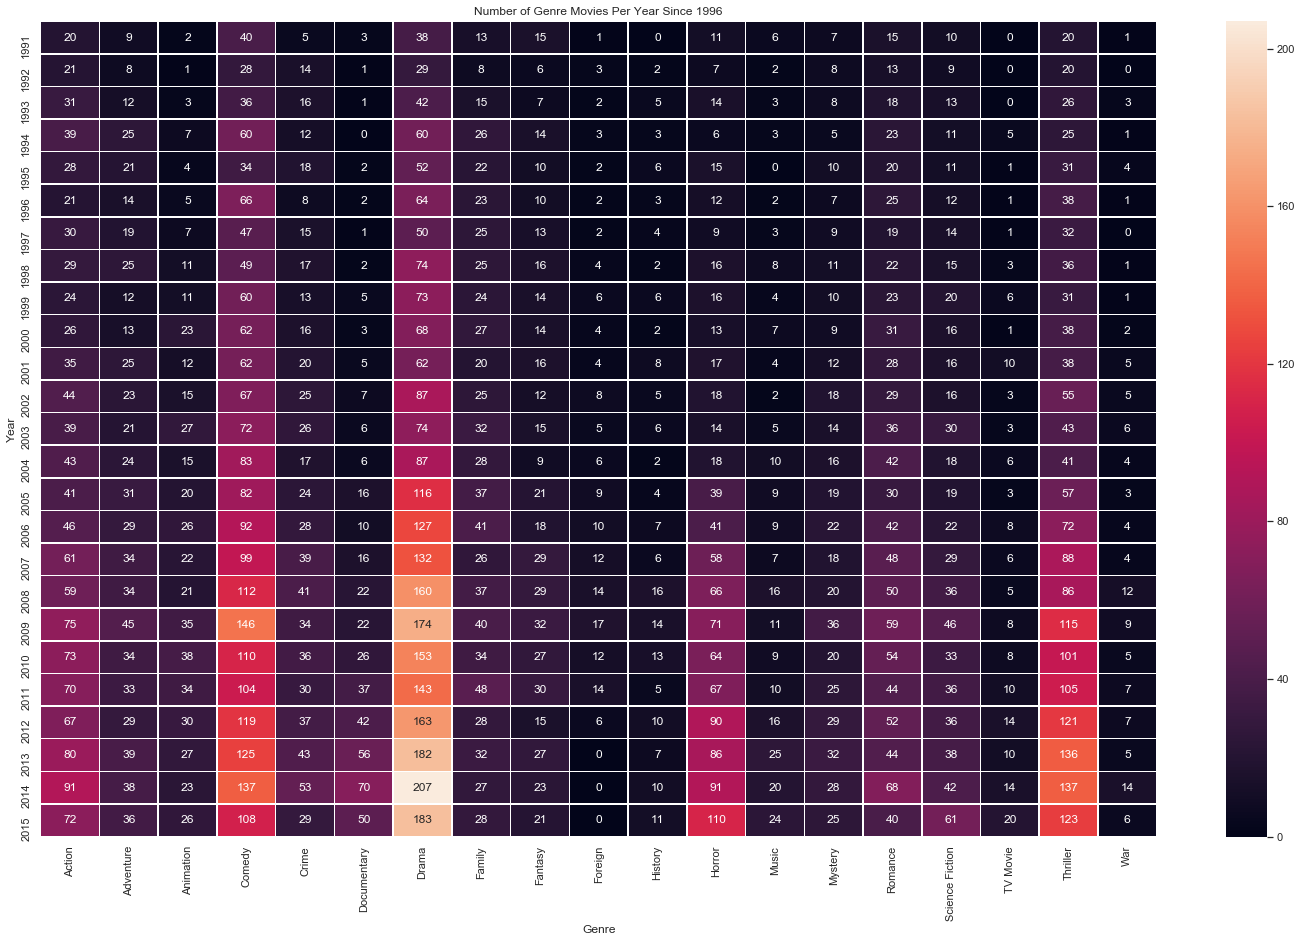

In [265]:
losses = losses.loc[losses.index > 1990, :]
f, ax = plt.subplots(figsize=(25, 15))
g = sns.heatmap(losses, annot=True, fmt="d", linewidths=.5, ax=ax)
g.set(title = 'Number of Genre Movies Per Year Since 1996')
g.set(xlabel='Genre', ylabel='Year')

[Text(201.5,0.5,'Year'), Text(0.5,111.453,'Genre')]

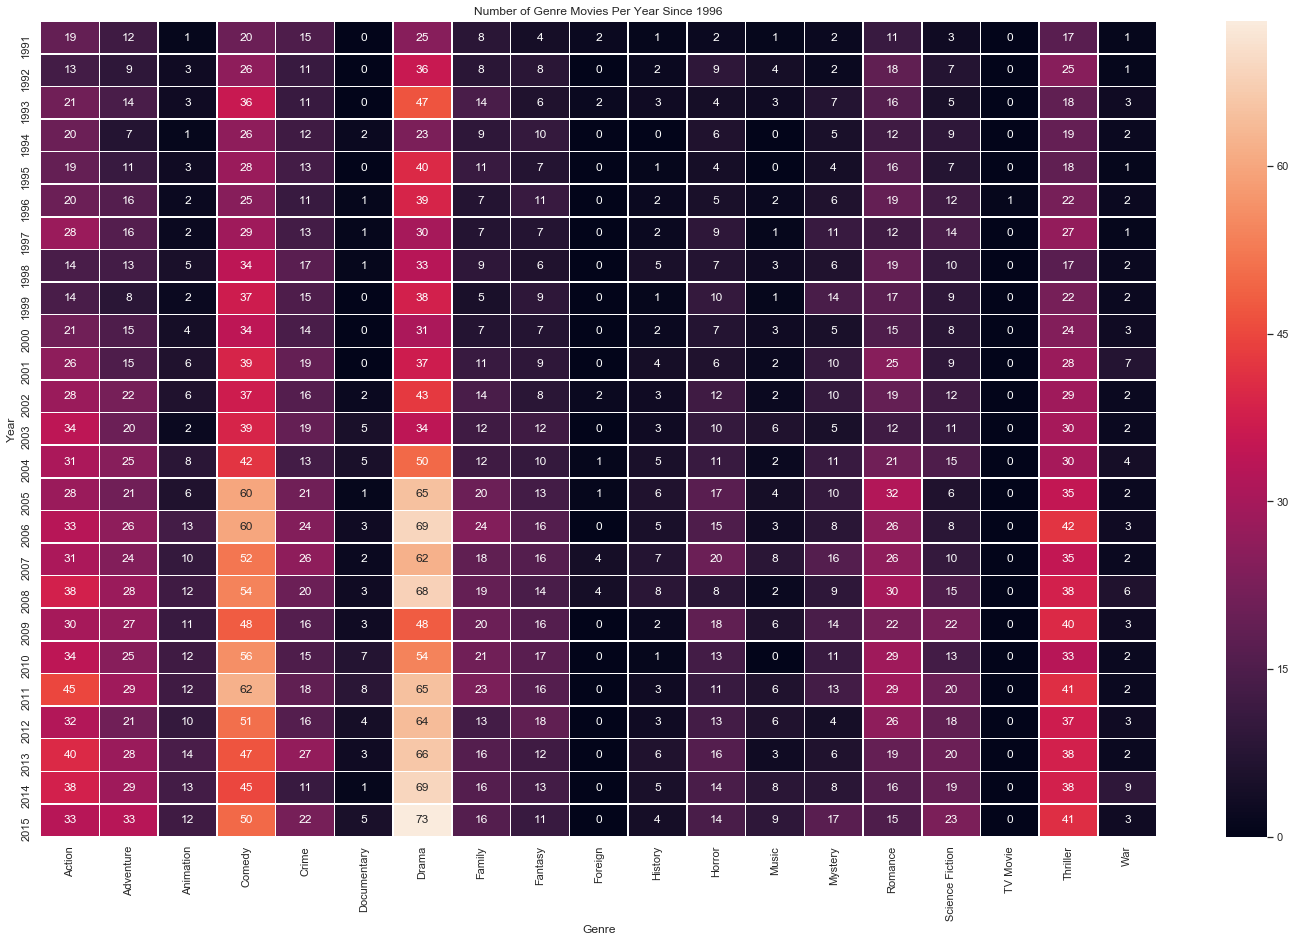

In [264]:
profits = profits.loc[profits.index > 1990, :]
f, ax = plt.subplots(figsize=(25, 15))
g = sns.heatmap(profits, annot=True, fmt="d", linewidths=.5, ax=ax)
g.set(title = 'Number of Genre Movies Per Year Since 1996')
g.set(xlabel='Genre', ylabel='Year')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<a id='references'></a>
## References

[Proper Utilization of Multilabel Binarizer](https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/)

[Pandas API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Seaborn Visualization API](https://seaborn.pydata.org/api.html)